<a href="https://colab.research.google.com/github/Ruthuvikas/recommendation_system/blob/main/Netflix_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

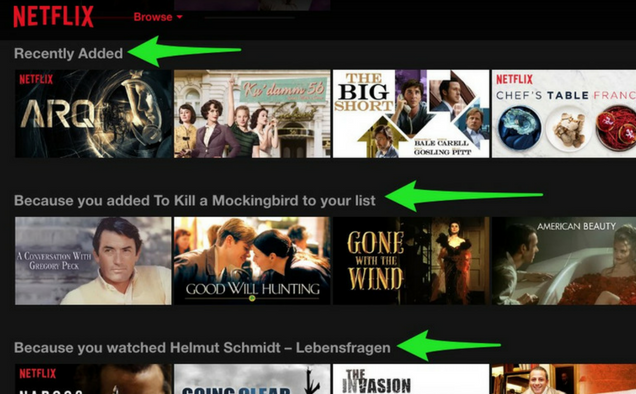

In [5]:
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize ratings matrix and move to GPU
ratings = torch.tensor([[3, 1, 1, 3, 1],
                        [1, 2, 0, 1, 3],
                        [3, 1, 1, 3, 0],
                        [4, 3, 5, 0, 4]], dtype=torch.float32).to(device)

# Seed for reproducibility
torch.manual_seed(42)

# Factorize into matrices A and B, and move them to GPU
num_users, num_movies = ratings.size()
latent_dim = 2  # Dimensionality of latent factors
A = torch.randn(num_users, latent_dim, requires_grad=True, device=device)
B = torch.randn(num_movies, latent_dim, requires_grad=True, device=device)

# Optimizer and loss function
optimizer = torch.optim.Adam([A, B], lr=1e-3)
criterion = torch.nn.MSELoss()

# Training loop
for step in range(10000):
    optimizer.zero_grad()

    # Mask for valid ratings
    mask = ratings > 0
    predictions = torch.matmul(A, B.t())

    # Compute masked loss
    loss = criterion(predictions[mask], ratings[mask]) + 1e-3 * (A.norm(2) + B.norm(2))

    # Backpropagation and optimization
    loss.backward()
    optimizer.step()

    # Print progress
    if step % 1000 == 0:
        print(f"Step {step}, Loss: {loss.item()}")

# Final result
print("Reconstructed Matrix:")
print(torch.matmul(A, B.t()).cpu())  # Move result to CPU for printing


Using device: cpu
Step 0, Loss: 4.380031108856201
Step 1000, Loss: 0.756179690361023
Step 2000, Loss: 0.14895042777061462
Step 3000, Loss: 0.01376285869628191
Step 4000, Loss: 0.008038720116019249
Step 5000, Loss: 0.008001535199582577
Step 6000, Loss: 0.007998904213309288
Step 7000, Loss: 0.00799481850117445
Step 8000, Loss: 0.007988618686795235
Step 9000, Loss: 0.00797970313578844
Reconstructed Matrix:
tensor([[2.9995, 0.9996, 1.0008, 2.9987, 0.9991],
        [1.0011, 1.9987, 3.9919, 0.9998, 2.9979],
        [2.9996, 0.9995, 1.0007, 2.9988, 0.9990],
        [3.9984, 3.0002, 4.9977, 3.9963, 4.0004]], grad_fn=<MmBackward0>)
